# basic exploratory data analysis on LasVegas hotel dataset

In [1]:
#importing of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

In [2]:
las_hot=pd.read_csv(r'/Users/gabriel/Downloads/LasVegasTripAdvisorReviews-Dataset.csv')
las_hot.head(60)

,Country,Total_Reviews,HotelReviews,Helpful Votes,Rating,Stay_Period,Traveler_Type,Has_Pool,Has_Gym,Has_Tennis_Court,Has_Spa,Has_Casino,Has_Free_Internet,Hotel_Name,Hotel_Stars,Hotel_Rooms,Continent,Membership_Years,Review_Month,"Review_weekday,"
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,"Thursday,"
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,"Friday,"
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,"Saturday,"
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,"Friday,"
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,"Tuesday,"
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,March,"Tuesday,"
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,4,April,"Friday,"
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,0,April,"Tuesday,"
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Asia,3,May,"Saturday,"
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,May,"Tuesday,"


In [3]:
mos_trtp=las_hot['Traveler_Type'].value_counts()
mos_trtp

Couples     214
Families    110
Friends      82
Business     74
Solo         24
Name: Traveler_Type, dtype: int64

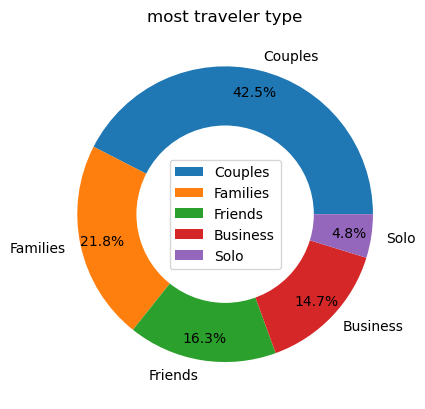

In [4]:
# visualing most traveler type using donut chart
explode=(0,0,0)

#donut chart
plt.pie(mos_trtp,labels=mos_trtp.index,autopct='%1.1f%%',pctdistance=0.85)

#draw a circle
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()

#adding circle
fig.gca().add_artist(centre_circle)

#add legend
plt.legend(mos_trtp.index,loc='center')

#adding title
plt.title('most traveler type')

plt.show()

## It is observed that most traveler type are the couples with 42.5% of the total traveller type

In [5]:
# top 5 countries with most lodged
np=las_hot['Country'].value_counts().head()
np

USA          217
UK            72
Canada        65
Australia     36
Ireland       13
Name: Country, dtype: int64

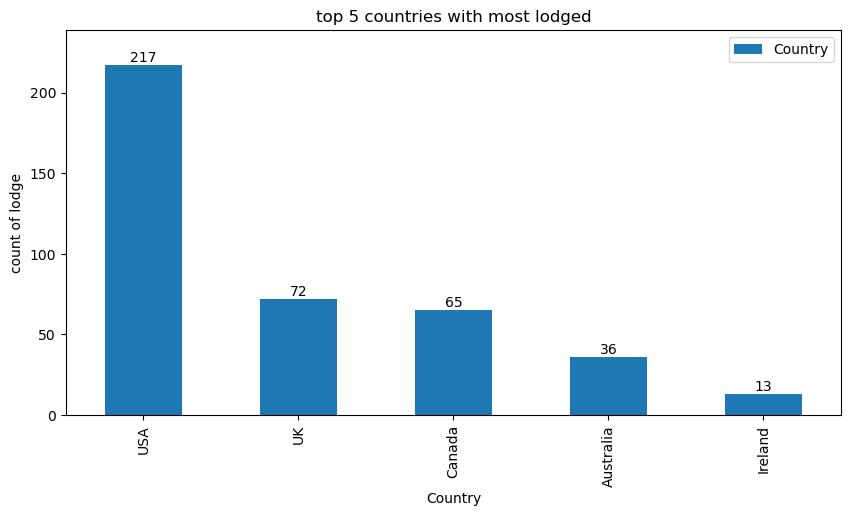

In [6]:
ax=np.plot(kind='bar',figsize=(10,5),title="top 5 countries with most lodged",xlabel='Country',ylabel='count of lodge',
                          legend='False' )
ax.bar_label(ax.containers[0],label_type='edge')
ax.margins(y=0.1)
plt.show()


### The Country with the most visit is the USA with a total of 217 visits while the UK has a total of 72 visits

In [7]:
noc=pd.DataFrame(las_hot['Hotel_Name'].groupby(las_hot.Country).nunique().sort_values(ascending=False).head(10))
noc

,Hotel_Name
Country,
UK,21
USA,21
Canada,20
Australia,18
India,10
Ireland,8
Mexico,7
Egypt,5
Germany,5


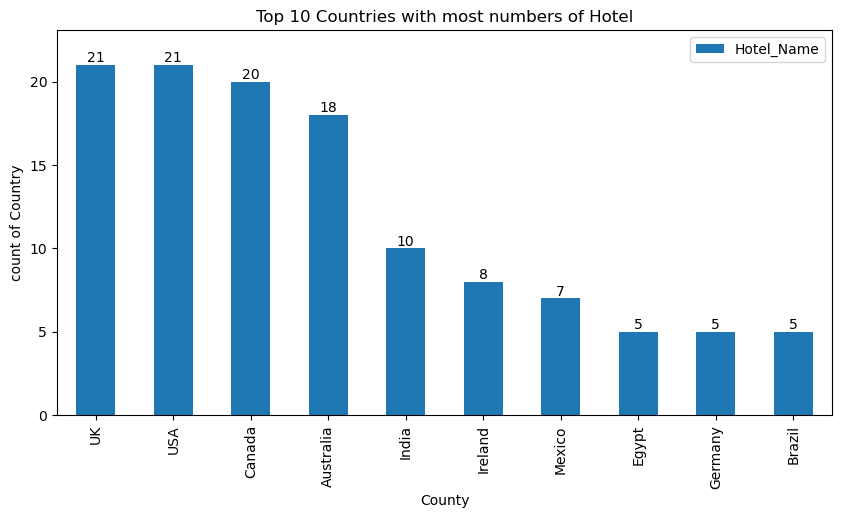

In [8]:
ap=noc.plot(kind='bar',figsize=(10,5),title="Top 10 Countries with most numbers of Hotel",xlabel='County',ylabel='count of Country',
                          legend='False' )
ap.bar_label(ap.containers[0],label_type='edge')
ap.margins(y=0.1)
plt.show()


### it is observed from the above chart that the countries with the most hotel are the  UK and the USA with 21 hotels each followed by Canada with 20 hotels

In [9]:
# continent with most lodge
hk=las_hot[['Continent','Hotel_Name']].Continent.value_counts()
hk

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: Continent, dtype: int64

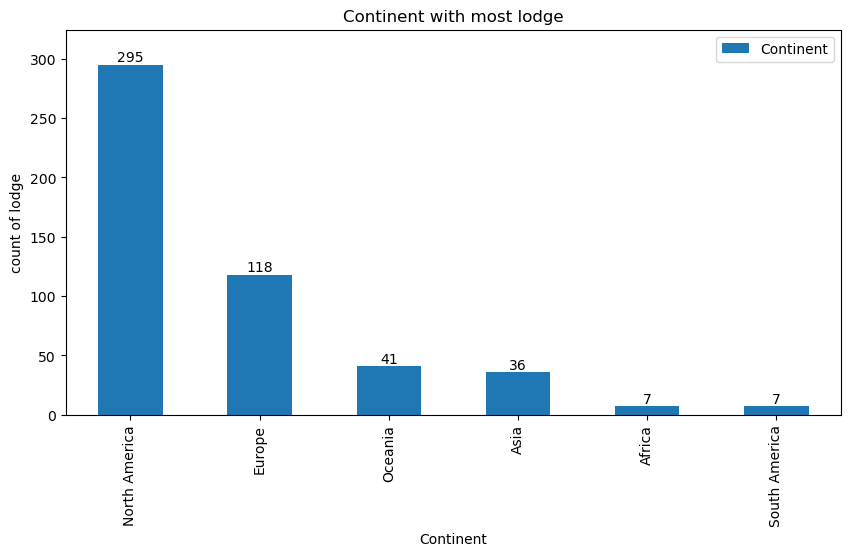

In [10]:
af=hk.plot(kind='bar',figsize=(10,5),title="Continent with most lodge",xlabel='Continent',ylabel='count of lodge',
                          legend='False' )
af.bar_label(af.containers[0],label_type='edge')
af.margins(y=0.1)
plt.show()


### Continent with the most Traveler visit is the North America having a total of 295 visit, with Europe being the second continent with most visit with a total of 118 visits

In [11]:
tr_co=las_hot[['Country','Traveler_Type']].value_counts().head(5)
tr_co

Country  Traveler_Type
USA      Couples          90
         Business         41
         Families         40
UK       Couples          37
USA      Friends          35
dtype: int64

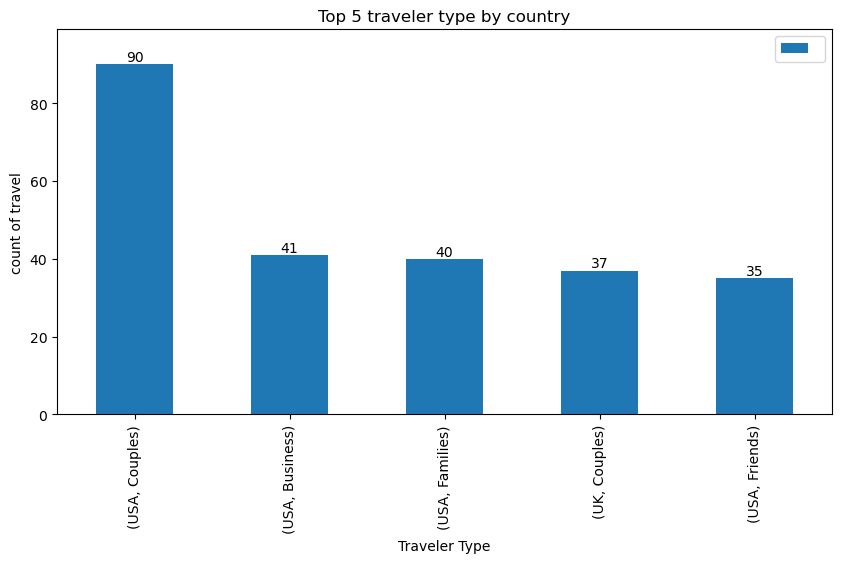

In [12]:
# top 5 Travel type by country
av=tr_co.plot(kind='bar',figsize=(10,5),title="Top 5 traveler type by country",xlabel='Traveler Type',ylabel='count of travel',
                          legend='False' )
av.bar_label(av.containers[0],label_type='edge')
av.margins(y=0.1)
plt.show()

### the most traveler types are the couples who lodge in the USA with 90 visits followed by the business type with 41 visit also visiting the USA

In [13]:
bn=las_hot['Has_Pool'].groupby(las_hot.Rating).value_counts()
bn

Rating  Has_Pool
1       YES           9
        NO            2
2       YES          26
        NO            4
3       YES          65
        NO            7
4       YES         155
        NO            9
5       YES         225
        NO            2
Name: Has_Pool, dtype: int64

In [14]:
pd.DataFrame(bn)

Has_Pool
Rating Has_Pool          
1      YES              9
       NO               2
2      YES             26
       NO               4
3      YES             65
       NO               7
4      YES            155
       NO               9
5      YES            225
       NO               2

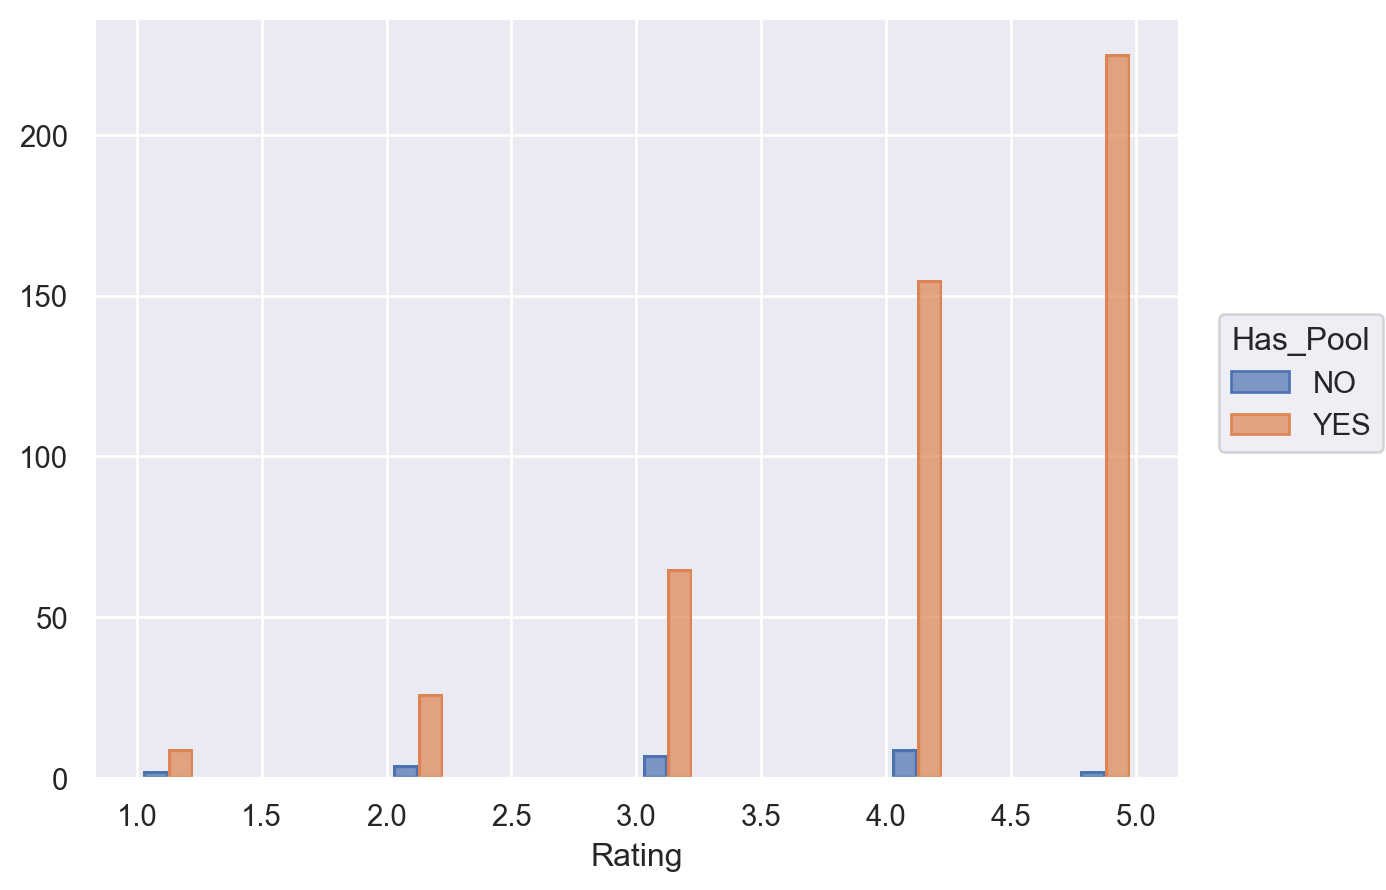

In [15]:
so.Plot(las_hot, x="Rating", color="Has_Pool").add(so.Bar(), so.Hist(), so.Dodge())

### it is observed that hotels with pool have a higher ratings than those with no pool

In [16]:
trty=las_hot['Traveler_Type'].groupby(las_hot.Rating).value_counts()
pd.DataFrame(trty)

Traveler_Type
Rating Traveler_Type               
1      Couples                    4
       Business                   3
       Families                   2
       Friends                    1
       Solo                       1
2      Couples                   12
       Families                   9
       Business                   5
       Friends                    2
       Solo                       2
3      Couples                   23
       Families                  22
       Business                  13
       Friends                   11
       Solo                       3
4      Couples                   66
       Business                  30
       Families                  29
       Friends                   29
       Solo                      10
5      Couples                  109
       Families                  48
       Friends                   39
       Business                  23
       Solo                       8

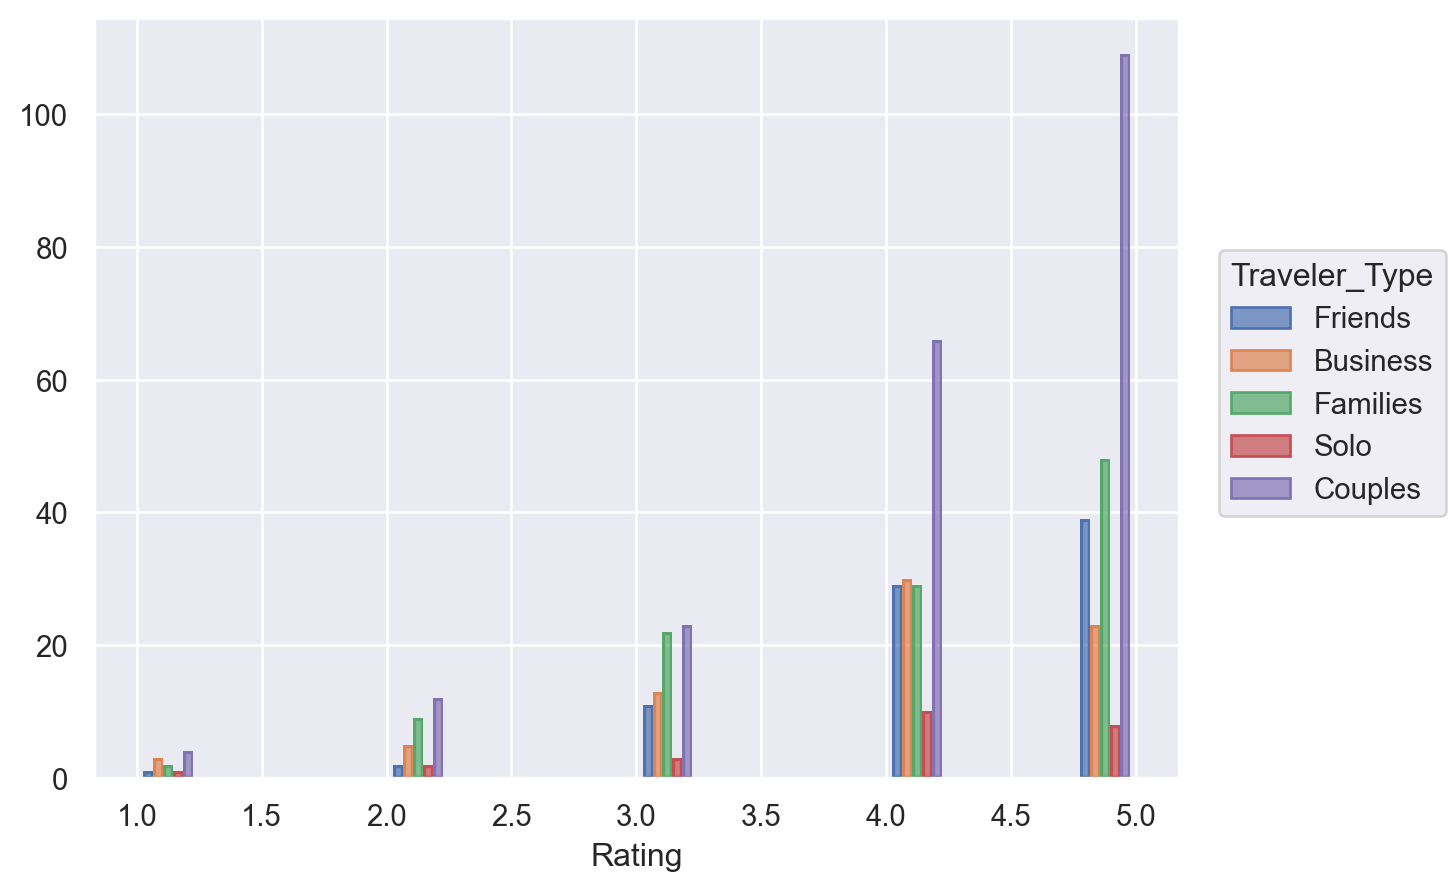

In [17]:
so.Plot(las_hot, x="Rating", color="Traveler_Type").add(so.Bar(), so.Hist(), so.Dodge())

### From the above chart, hotels have higher satisfaction rating by larger number of couples followed by families while the traveller type with the least number is the Solo

In [18]:
# to know the location of the cheapest self contain
self_loc=las_hot.groupby(['Hotel_Name','Rating']).Rating.min().astype('int').unstack('Hotel_Name')
self_loc

Hotel_Name,Bellagio Las Vegas,Caesars Palace,Circus Circus Hotel & Casino Las Vegas,Encore at wynn Las Vegas,Excalibur Hotel & Casino,Hilton Grand Vacations at the Flamingo,Hilton Grand Vacations on the Boulevard,Marriott's Grand Chateau,Monte Carlo Resort&Casino,Paris Las Vegas,...,The Cromwell,The Palazzo Resort Hotel Casino,The Venetian Las Vegas Hotel,The Westin las Vegas Hotel Casino & Spa,Treasure Island- TI Hotel & Casino,Tropicana Las Vegas - A Double Tree by Hilton Hotel,Trump International Hotel Las Vegas,Tuscany Las Vegas Suites & Casino,Wyndham Grand Desert,Wynn Las Vegas
Rating,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,2.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,...,2.0,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


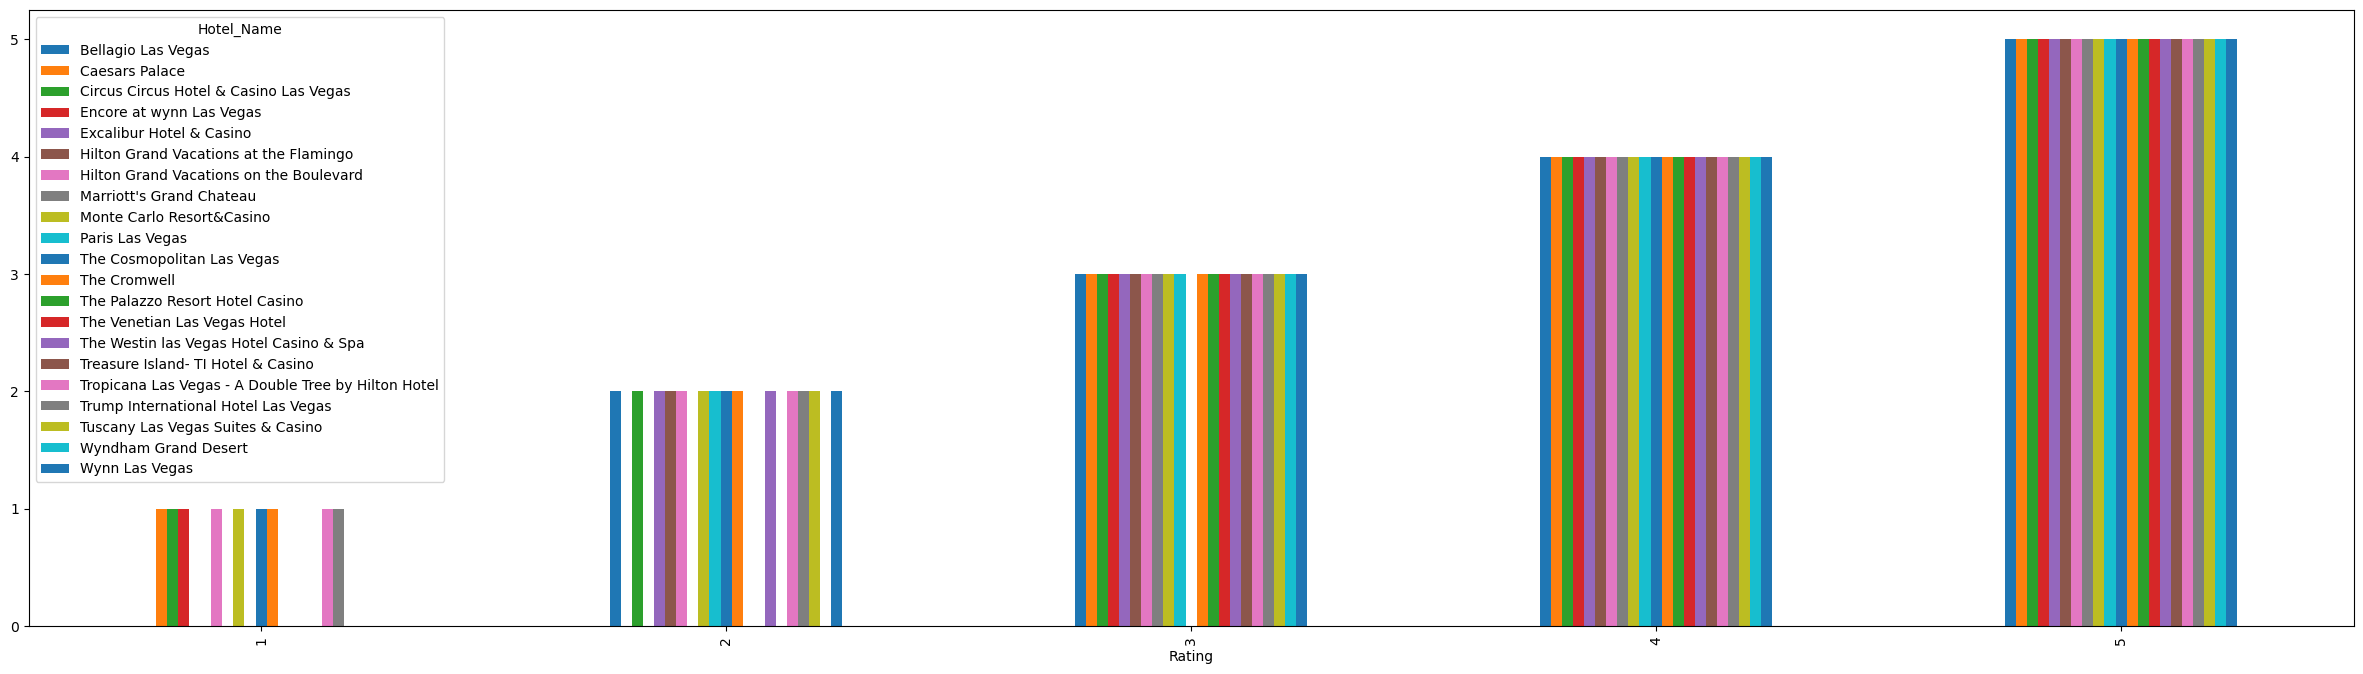

In [19]:
self_loc.plot.bar(figsize=(30,8))
plt.ticklabel_format(style='plain',axis='y')
plt.show()

### it is observed that Hotels with Rating of 5 have the most number of counts


In [20]:
self_lo=las_hot.groupby(['Traveler_Type']).Stay_Period.value_counts().astype('int').unstack('Traveler_Type')
self_lo

Traveler_Type,Business,Couples,Families,Friends,Solo
Stay_Period,,,,,
Dec-Feb,24,51,27,15,7
Jun-Aug,10,50,37,21,8
Mar-May,20,54,24,24,6
Sep-Nov,20,59,22,22,3


In [21]:
bk=self_lo.sum(axis=1).sort_values(ascending=False)
pd.DataFrame(bk)

,0
Stay_Period,
Mar-May,128
Jun-Aug,126
Sep-Nov,126
Dec-Feb,124


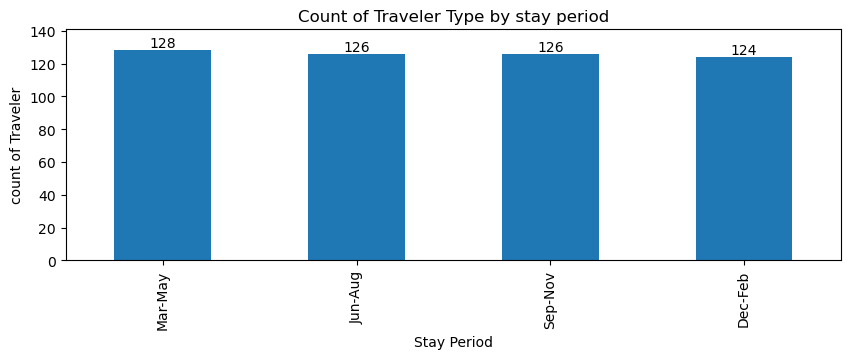

In [22]:
ax=bk.plot(kind='bar',figsize=(10,3),title='Count of Traveler Type by stay period',xlabel='Stay Period',ylabel='count of Traveler',
                               legend=False,stacked=True)
ax.bar_label(ax.containers[0],label_type='edge')
ax.margins(y=0.1)
plt.show()

### It could be noted from the above chart that the stay period with the most traveler  type count is between Mar-May with a total count of 128 while Jun-Aug and Sep-Nov has same number of count of traveler type of 126, with the least being Dec-Feb with a count 124.

In [23]:
jh=las_hot[['Stay_Period','Traveler_Type']].value_counts()
ad=pd.DataFrame(jh)
bl=ad.head(10)
bl

0
Stay_Period Traveler_Type    
Sep-Nov     Couples        59
Mar-May     Couples        54
Dec-Feb     Couples        51
Jun-Aug     Couples        50
            Families       37
Dec-Feb     Families       27
            Business       24
Mar-May     Friends        24
            Families       24
Sep-Nov     Friends        22

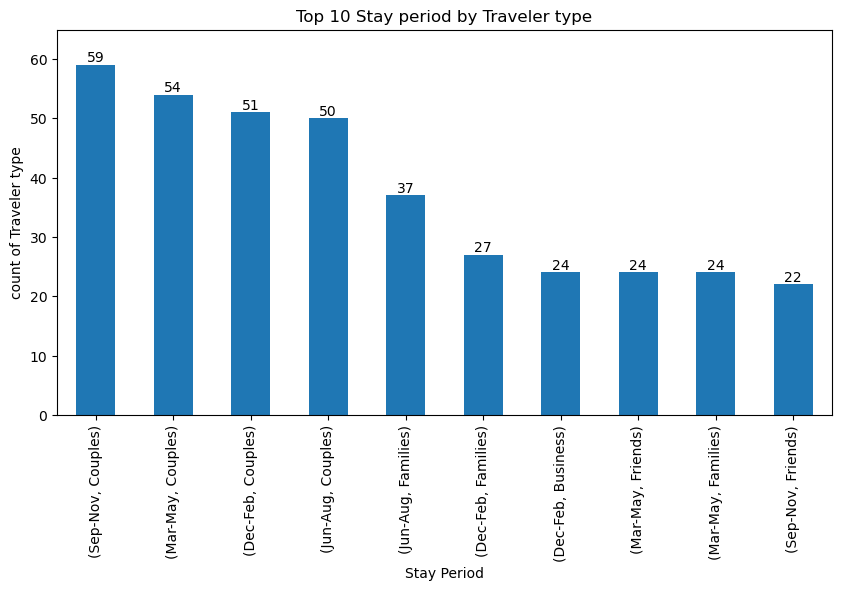

In [24]:
ap=bl.plot(kind='bar',figsize=(10,5),title='Top 10 Stay period by Traveler type',xlabel='Stay Period',ylabel='count of Traveler type',
                               legend=False,stacked=True)
ap.bar_label(ap.containers[0],label_type='edge')
ap.margins(y=0.1)
plt.show()

### From the above chart,the stay period with the most traveler type is Sep-Nov with the most traveler type being Couples with 59 counts while the stay period with the next count of Traveler type is Mar-May with having Couples as the most Traveler type in it with 54 counts